# Algorithmes de Seconde - 2019

Ce document contient la liste exhaustive des exemples d'algorithmes figurant dans le programme de seconde.

L'écriture de ces algorithmes se veut simple, sans utilisation exagérée de fonctions "toutes faites" inclues dans les bibliothèques de Python et en utilisant à chaque fois une écriture fonctionnelle des algorithmes afin de pouvoir être réutilisés à l'avenir.

Certaines fonctions Python sont complétées par des versions "professeur" afin d'enrichir les illustrations proposées aux élèves. En particulier, merci à M.S.Modeliar (Université d'Artois) pour la création de figures dynamiques à l'aide de matplotlib.

------------------

# Partie "Nombres et calculs"

## 1. Déterminer par balayage un encadrement de $\sqrt{2}$ d’amplitude inférieure ou égale à $10^{-n}$.

On utilise le fait que la fonction carré est croisante et, en partant de 1, on calcule les carrés des nombres tant qu'ils sont plus petits que 2, en avançant à chaque fois d'un pas de $10^{-n}.$

In [45]:
def BalayageRacine2(pas):   # Le pas sera de la forme 1O^{-n}
    x = 1
    while x*x <=2:
        x = x + pas
    return (x-pas,x)

In [46]:
BalayageRacine2(0.0001)

(1.4141999999999544, 1.4142999999999544)

------------------

## 2. Déterminer si un entier naturel $a$ est multiple d’un entier naturel $b$.

On peut résoudre ce problème à l'aide de plusieurs algorithmes selon qu'on veuille ou non utiliser le reste de la division euclidienne fourni par Python

In [3]:
def AestmultipledeB(a,b):
    if a%b == 0:
        return True
    else:
        return False

In [4]:
AestmultipledeB(2024,6)

False

In [8]:
def AestmultipledeB_2(a,b):
    n = 0  
    while n*b < a:
        n = n+1
    if n*b==a:
        return True
    else:
        return False

In [9]:
AestmultipledeB_2(2024,4)

True

------------------

## 3. Pour des entiers $a$ et $b$ donnés, déterminer le plus grand multiple de $b$ inférieur ou égal à $a$.

On suppose que $b\leqslant a$ et on teste successivement les multiples de $b$ tant qu'ils sont inférieurs ou égaux à $a$. La fonction renvoie le multiple de $b$ précédent donc $(n-1)\times b$.

**Remarque:**

On peut améliorer l'algorithme en commençant par tester si $b\leqslant a$.

In [11]:
def PlusGrandMultiple(a,b):
    n = 1
    while n*b<=a:
        n = n+1
    return (n-1)*b

In [17]:
PlusGrandMultiple(172,17)

170

------------------

## 4. Déterminer si un entier naturel est premier

On utilise l'opération **n%i** qui renvoie le reste de la division euclidienne de $n$ par $i$. On teste tous les entiers compris entre 2 et $n-1$ pour savoir s'ils sont diviseurs de $n$.

**Remarques:** 
- La fonction utilise le fait que dès qu'un appel à **return** est effectué, la fonction d'arrête.
- On peut améliorer l'algorithme en s'arrêtant plus tôt et n'allant pas jusqu'à $n$ dans la boucle *Pour*.

In [1]:
def EstilPremier(n):
    for i in range(2,n):
        if n%i==0:
            return False
    return True

In [2]:
EstilPremier(97)

True

In [3]:
EstilPremier(203)

False

### Une variante de l'algorithme basée sur l'obtention de la liste des diviseurs
On peut créer une fonction qui détermine dans un premier temps la liste des diviseurs de l'entier $n$ puis qui teste si la longueur de cette liste est égale à 2 (cas d'un nombre premier) ou pas.

**Remarque:**

La fonction renvoie un booléen, qu'il est facile de récupérer ensuite dans un autre fonction, et la liste des diviseurs: il est en effet intéressant dans un premier temps d'observer cette liste, on peut ensuite s'en dispenser et ne garder que le booléen.

In [8]:
def EstilPremier2(n):
    ListeDiviseurs=[]
    for i in range(1,n+1):
        if n%i==0:
            ListeDiviseurs=ListeDiviseurs+[i]  # On peut aussi utiliser la méthode .append
    if len(ListeDiviseurs)==2:
        return True,ListeDiviseurs
    else:
        return False,ListeDiviseurs

In [9]:
EstilPremier2(97)

(True, [1, 97])

In [10]:
EstilPremier2(203)

(False, [1, 7, 29, 203])

### Une variante utilisant la fonction précédemment définie pour savoir si $a$ est un multiple de $b$

Plutôt que d'utiliser la division euclidienne de Python, on utilse la fonction précédemment définie ce qui renforce la conception modulaire des algorithmes chez les élèves.

In [10]:
def EstilPremier3(n):
    for i in range(2,n):
        if AestmultipledeB_2(n,i):
            return False
    return True

In [11]:
EstilPremier3(97)

True

In [12]:
EstilPremier3(203)

False

------------------

## 5. Déterminer la première puissance d’un nombre positif donné supérieure ou inférieure à une valeur donnée.

On s'inspire de l'algorithme utilisé pour résoudre le problème "Pour des entiers $a$ et $b$ donnés, déterminer le plus grand multiple de $b$ inférieur ou égal à $a$".

On cherche la première puissance de $b$ inférieure (strictement) ou supérieure (strictement) à $a$ dans le cas où $a$ n'est pas une puissance de $b$.

In [13]:
def PremierePuissanceInferieure(a,b):
    puissance = 1
    while puissance < a:
        puissance = puissance * b
    return puissance/b

In [14]:
PremierePuissanceInferieure(37698,14)

2744.0

In [16]:
def PremierePuissanceSuperieure(a,b):
    puissance = 1
    while puissance < a:
        puissance = puissance * b
    return puissance

In [17]:
PremierePuissanceSuperieure(37698,14)

38416

**Remarque:** On peut améliorer l'algorithme en testant d'abord sir le nombre $a$ est une puissance de $b$ puis, si ce n'est pas le cas, renvoyer les deux puissances de $b$ qui encadrent $a$.

In [20]:
def PremieresPuissances(a,b):
    n=0
    while b**n<a:
        n = n+1
    if b**n==a:
        return 'a est une puissance de b'
    else:
        return PremierePuissanceInferieure(a,b),PremierePuissanceSuperieure(a,b)

In [21]:
PremieresPuissances(1000,10)

'a est une puissance de b'

In [22]:
PremieresPuissances(2345678,10)

(1000000.0, 10000000)

------------------

# Partie "Géométrie"

## 1. Étudier l’alignement de trois points dans le plan.

La référence à cet algorithme apparait dans le programme officiel dans la partie "Représenter et caractériser les droites du plan". On peut donc utiliser cette approche pour étudier l'alignement de trois points du plan. 
On peut également faire référence à la colinéarité des vecteurs en utilisant le déterminant de deux vecteurs.

À noter qu'il faut prendre garde aux tests d'égalités avec des flottants !

### Version utilisant les équations de droites

On détermine le coefficient directeur et l'ordonnée à l'origine de la droite formée par les deux premiers points (dans le cas où ils ont des abscisses différentes) puis on teste si les coordonnées du troisième point vérifient ou non l'équation de la droite.

In [25]:
def CoefficientDirecteur(x1,y1,x2,y2): # On se place dans le cas où x1 est différent de x2
    return (y2-y1)/(x2-x1)

def OrdonneeALorigine(x1,y1,x2,y2): # On se place dans la cas où x1 est différence de x3
    return y1-CoefficientDirecteur(x1,y1,x2,y2)*x1

def PointsAlignes(x1,y1,x2,y2,x3,y3):
    if abs(x1-x2) < 10**(-12):
        if abs(x1-x3) < 10**(-12):
            return True
        else:
            return False
    else:
        a = CoefficientDirecteur(x1,y1,x2,y2)
        b = OrdonneeALorigine(x1,y1,x2,y2)
        if abs(y3-a*x3-b) < 10**(-12):
            return True
        else:
            return False

In [26]:
PointsAlignes(3,4,3,5,3.1,6)

False

In [27]:
PointsAlignes(3,4,3,5,3,6)

True

In [28]:
PointsAlignes(2,3,7,8,17,18)

True

In [29]:
PointsAlignes(2,3,7,8,17,18.001)

False

### Version utilisant la colinéarité de vecteurs

On crée d'abord une fonction calculant le déterminant de deux vecteurs que l'on réinvestit ensuite.

In [38]:
def determinant(xu,yu,xv,yv):
    return xu*yv-yu*xv

def PointsAlignes2(x1,y1,x2,y2,x3,y3):
    if abs(determinant(x2-x1,y2-y1,x3-x1,y3-y1))<10**(-12):
        return True
    else:
        return False

In [40]:
PointsAlignes2(2,3,7,8,17,18)

True

In [41]:
PointsAlignes2(2,3,7,8,17,18.001)

False

------------------

## 2. Déterminer une équation de droite passant par deux points donnés.

Dans le cas où les deux points, que l'on suppose distincts !, ont la même abscisse, on renvoit simplement l'équation sous la forme $x=c$. Dans l'autre cas, on renvoit l'équation réduite de la droite en utilisant les fonctions permettant de déterminer le coefficient directeur et l'ordonnée à l'origine ci-dessus.

In [42]:
def EquationDeDroite(x1,y1,x2,y2):
    if abs(x1-x2)<10**(-12):
        return 'x='+str(x1)  # on revoie l'équation sous forme d'un texte
    else:
        a = CoefficientDirecteur(x1,y1,x2,y2)
        b = OrdonneeALorigine(x1,y1,x2,y2)
        return 'y='+str(a)+'*x+'+str(b)

In [43]:
EquationDeDroite(2,4,2,8)

'x=2'

In [44]:
EquationDeDroite(2,4,5,5)

'y=0.3333333333333333*x+3.3333333333333335'

------------------

# Partie "Fonctions"

## 1. Pour une fonction dont le tableau de variations est donné, algorithmes d’approximation numérique d’un extremum (balayage, dichotomie).

On se place dans la situation d'une fonction $f$ définie sur un intervalle $[a;b]$, qui est croissante sur $[a;c]$ puis décroissante sur $[c;b]$. On cherche donc une valeur approchée de $f(c)$. On va choisir la fonction $f$ définie pour tout $x\in[-4;0]$ par $f(x)=x^3+3x^2-2x+1$.

### Algorithme par balayage

In [49]:
def f(x):
    return x**3+3*x**2-2*x+1

def BalayageExtremum(pas):
    x = -4
    maximum_provisoire = f(x)
    while x<=0:
        if f(x)>maximum_provisoire:
            maximum_provisoire = f(x)
        x = x + pas
    return maximum_provisoire 

In [52]:
BalayageExtremum(0.00001)

9.303314829042701

**Remarque:** On peut améliorer l'algorithme en renvoyant à la fois la valeur approchée de l'extrémum et du réel en lequel il est atteint

In [53]:
def f(x):
    return x**3+3*x**2-2*x+1

def BalayageExtremum2(pas):
    x = -4
    maximum_provisoire = f(x)
    while x<=0:
        if f(x)>maximum_provisoire:
            maximum_provisoire = f(x)
            x_cherche = x
        x = x + pas
    return x_cherche,maximum_provisoire

In [54]:
BalayageExtremum2(0.00001)

(-2.290989999988804, 9.303314829042701)

------------------

## 2. Algorithme de calcul approché de longueur d’une portion de courbe représentative de fonction.

On définit d'abord une fonction permettant de calculer la distance entre deux points dans un repère orthonormé. Une fonction $f$ étant définie, on approxime alors la longueur de la portion de courbe représentative de $f$ sur un intervalle $[a;b]$ choisi par l'utilisateur avec un pas également choisi par l'utilisateur.  

On peut également choisir de partager l'intervalle $[a;b]$ en $n$ parties égales.

In [63]:
from math import *

def Distance(x1,y1,x2,y2):
    return sqrt((x2-x1)**2+(y2-y1)**2)

def f(x):
    return x**3   # Fonction à choisir par l'utilisateur

def LongueurCourbe(f,a,b,pas):
    longueur = 0
    x = a
    while x<b:
        longueur = longueur + Distance(x,f(x),x+pas,f(x+pas))
        x = x + pas
    return longueur

In [64]:
LongueurCourbe(f,-5,5,0.001)

251.360601033675

------------------

# Partie "Statistiques et Probabilités"

## 1. Pour des données réelles ou issues d’une simulation, lire et comprendre une fonction écrite en Python renvoyant la moyenne $m$, l’écart type $s$, et la proportion d’éléments appartenant à $[m-2s,m+2s]$.

On peut procéder en deux temps:

- D'abord créer une fonction permettant de simuler une expérience aléatoire
- Créer une fonction répondant renvoyant la moyenne $m$, l’écart type $s$, et la proportion d’éléments appartenant à $[m-2s,m+2s]$. Cette fonction peut également être utilisée pour toutes les listes de données numériques réelles.

On choisit $n$ personnes dont on mesure le taux de glycémie dans le sang (qui suit la loi normale d'espérance $1$ $g.L^{-1}$ et d'écart-type $0,1$ $g.L^{-1}$ ce qui permet de simuler une liste et de la donner *brute* aux élèves).

In [52]:
from math import *
from random import *
import numpy.random as alea

def TauxGlycemie(n):
    Liste = []
    for compteur in range(n):
        glycemie = alea.randn()*0.1+1  # randn() permet de simuler la loi normale centrée réduite
        Liste = Liste + [glycemie]
    return Liste

def Moyenne(Liste):
    n = len(Liste)  # Longueur de la liste
    somme = 0
    for t in Liste:
        somme = somme + t
    moyenne = somme / n
    return moyenne

def Ecarttype(Liste):
    n = len(Liste)
    somme_ecart_moyenne = 0
    m = Moyenne(Liste)
    for t in Liste:
        somme_ecart_moyenne = somme_ecart_moyenne + (t-m)**2
    variance = somme_ecart_moyenne / n
    ecart_type = sqrt(variance)
    return ecart_type

def Parametres(Liste):
    m = Moyenne(Liste)
    s = Ecarttype(Liste)
    
    nombre_dans_intervalle = 0
    for t in Liste:
        if m-2*s < t and t < m+2*s:
            nombre_dans_intervalle = nombre_dans_intervalle + 1
    frequence = nombre_dans_intervalle / len(Liste)
    
    return m, s, frequence

In [54]:
Parametres(TauxGlycemie(5000))

(1.0005852058802556, 0.10017475913062676, 0.954)

**Remarque:** Il est intéressant également d'ajouter une représentation graphique à la fonction précédente pour renforcer le côté "exceptionnel" des valeurs à l'extérieur de l'intervalle $[m-2s;m+2s]$.

In [61]:
from math import *
from random import *
import numpy.random as alea
import matplotlib.pyplot as plt

def TauxGlycemie(n):
    Liste = []
    for compteur in range(n):
        glycemie = alea.randn()*0.1+1  # randn() permet de simuler la loi normale centrée réduite
        Liste = Liste + [glycemie]
    return Liste

def Moyenne(Liste):
    n = len(Liste)  # Longueur de la liste
    somme = 0
    for t in Liste:
        somme = somme + t
    moyenne = somme / n
    return moyenne

def Ecarttype(Liste):
    n = len(Liste)
    somme_ecart_moyenne = 0
    m = Moyenne(Liste)
    for t in Liste:
        somme_ecart_moyenne = somme_ecart_moyenne + (t-m)**2
    variance = somme_ecart_moyenne / n
    ecart_type = sqrt(variance)
    return ecart_type

def Parametres2(Liste):
    m = Moyenne(Liste)
    s = Ecarttype(Liste)
    
    nombre_dans_intervalle = 0
    for t in Liste:
        if m-2*s < t and t < m+2*s:
            nombre_dans_intervalle = nombre_dans_intervalle + 1
    frequence = nombre_dans_intervalle / len(Liste)
    
    Liste_X = range(1,len(Liste)+1)
    Liste_Y = Liste
    
    plt.plot(Liste_X,Liste_Y,"b.")
    plt.plot((0,len(Liste)+1),(m,m),"g")
    plt.plot((0,len(Liste)+1),(m-2*s,m-2*s),"r")
    plt.plot((0,len(Liste)+1),(m+2*s,m+2*s),"r")
    plt.show()
    
    return m, s, frequence

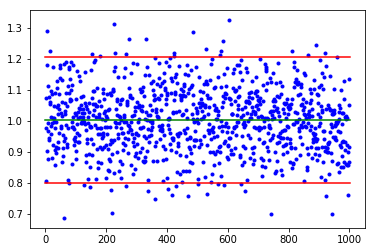

(1.0026057656944345, 0.1017183783349827, 0.956)

In [62]:
Parametres2(TauxGlycemie(1000))

------------------

### 2. Lire et comprendre une fonction Python renvoyant le nombre ou la fréquence de succès dans un échantillon de taille $n$ pour une expérience aléatoire à deux issues.

On considère une expérience aléatoire à deux issues dont le succés à pour probabilité $p$. On répète cette expérience aléatoire $n$ fois.
On peut écrire la fonction renvoyant la fréquence de succès en modifiant la fin de la fonction renvoyant le nombre de succès ou alors appeler cette fonction.

In [1]:
from random import *

def nombre_succes(n,p):
    nb_succes = 0
    for compteur in range(n):
        if random()<p:
            nb_succes = nb_succes + 1
    return nb_succes

def frequence_succes(n,p):
    return nombre_succes(n,p)/n


In [3]:
frequence_succes(1000,0.7)

0.71

------------------

### 3. Observer la loi des grands nombres à l’aide d’une simulation sur Python ou tableur.

On considère un dé à six faces dont la face 6 a été remplacée par 1. On souhaite observer la fréquence de 1 au fur et à mesure de la répétition d'épreuves. 

**Remarque:** Plutôt que d'utiliser la fonction *random()*, on peut utiliser la fonction *choice()* qui s'avère très explicite pour les élèves.

In [9]:
import matplotlib.pyplot as plt
from random import *

def de_truque():
    DE = [1,1,2,3,4,5]
    return choice(DE)
    
def representation_graphique(n):
    Liste_X=[0]
    Liste_Y=[0]
    nb_succes = 0
    for compteur in range(1,n+1):
        Liste_X = Liste_X + [compteur]
        if de_truque()==1:
            nb_succes = nb_succes + 1
        Liste_Y = Liste_Y + [nb_succes / compteur]
    plt.plot(Liste_X,Liste_Y,'b.')
    plt.grid()
    plt.show()

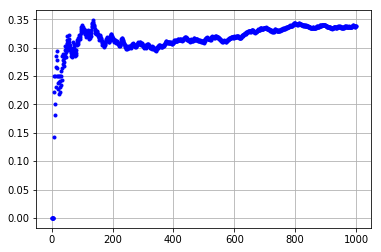

In [12]:
representation_graphique(1000)

**Remarque:** Il est intéressant de montrer la stabilisation de manière "dynamique" en utilisant l'animation de matplotlib. Bien évidemment, cet algorithme est à destination du professeur, pas de l'élève.

Penser à choisir la valeur de $N$ nombre d'expériences aléatoires à réaliser.

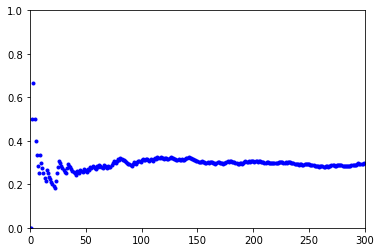

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from random import *

from IPython.display import HTML

###########
N = 300   # Nombre d'expériences aléatoires à réaliser
###########

def de_truque():
    DE = [1,1,2,3,4,5]
    return choice(DE)
    
def frequences(n):
    Liste_Y=[0]
    nb_succes = 0
    for compteur in range(1,n+1):
        if de_truque()==1:
            nb_succes = nb_succes + 1
        Liste_Y = Liste_Y + [nb_succes / compteur]
    return Liste_Y

fig, ax = plt.subplots()
xdata, ydata = [], []
points, = plt.plot([], [], 'b.')

Liste_a_representer = frequences(N)

def init():
    ax.set_xlim(0, N)
    ax.set_ylim(0, 1)
    return points,

def update(i):
    xdata.append(i)
    ydata.append(Liste_a_representer[i])
    points.set_data(xdata, ydata)
    return points,

ani = FuncAnimation(fig, update, frames=N,init_func=init, blit=True)
HTML(ani.to_jshtml())
#HTML(ani.to_html5_video())